## Observations and Insights 

1. The bar chart and pie chart show that the dataset is quite evenly spread in terms of drug regimen and gender. This means that there is no bias or over/under representation of one or more drugs over another and similarly no gender bias. Therefore, the data can be seen as fair and even. 

2. Of the four drugs isolated in the box plot, Ramicane and Capomulin have the smallest final tumor volume of all the drugs, whereas Infubinol and Ceftamin have the largest. The Ramicane appears most effective, as the total range (from whisker to whisker) appears smallest in tumor volume (approx. 21 to 45mm3) with a fairly narrow IQR, and a lower median tumour volume than the other three drugs. Also note that Infubinol has one potential outlier, whereas the others appear not to.  

3. The average weight to tumour volume of mice on Capomulin regimen have a correlation coefficient of 0.84, which is considered a strong correlation. This shows that there is a strong correlation between the mice's weight and the volume of their tumour, which seems logical, as a larger mouse may be more likely to have a larger tumour. This may also suggest that the tumour volume is proportional to the mouse.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
g316    10
o287    10
a401    10
j365    10
        ..
x226     1
h428     1
l872     1
o848     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = combined_df.loc[combined_df.duplicated(["Mouse ID","Timepoint"], keep=False),:]
dup_id = dup.at[908,"Mouse ID"]
dup_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_df.loc[combined_df["Mouse ID"] == dup_id, :]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] != dup_id, :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

g316    10
m650    10
a401    10
j365    10
a275    10
        ..
d133     1
n482     1
u153     1
t573     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)": mean_df,
    "Median Tumor Volume (mm3)": median_df,
    "Variance Tumor Volume (mm3)": var_df,
    "Standard Deviation Tumor Volume (mm3)": std_df,
    "Standard Error of the Mean Tumor Volume (mm3)": sem_df,
})

stats_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error of the Mean Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# (?) See above method.

## Bar and Pie Charts

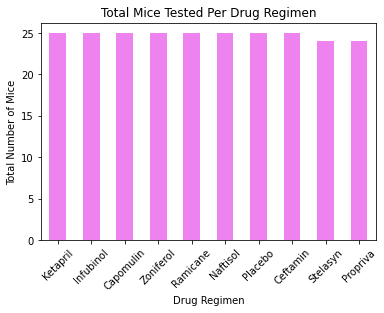

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_drugs = clean_df[["Mouse ID","Drug Regimen"]].drop_duplicates()
mice_per_drug = total_drugs["Drug Regimen"].value_counts()
mice_per_drug.plot(kind="bar", rot=45, color="violet")
plt.title("Total Mice Tested Per Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

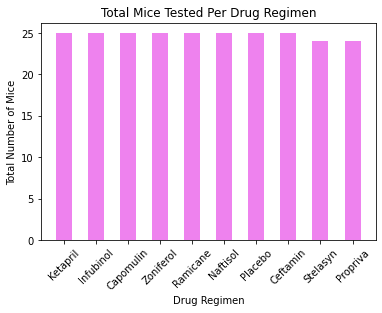

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs_list = list(mice_per_drug.index.values) 
mpd_values = mice_per_drug.tolist()
plt.bar(drugs_list, mpd_values, width=0.5, color="violet", align="center")
plt.title("Total Mice Tested Per Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="45")
plt.show()

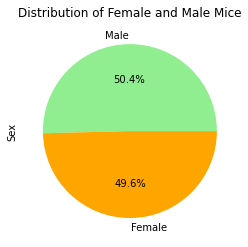

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_gross = clean_df[["Mouse ID", "Sex"]].drop_duplicates()
sex_net = sex_gross.Sex.value_counts()
sex_pie = sex_net.plot(kind="pie", title="Distribution of Female and Male Mice", 
                       autopct="%1.1f%%", colors = ["lightgreen", "orange"])

plt.show()

(-1.1031843716069307,
 1.1001516367431872,
 -1.103492681505578,
 1.1018390827045563)

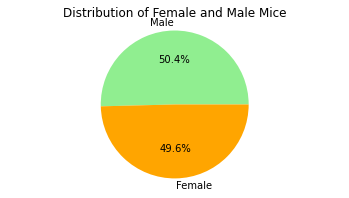

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

sex_labels = sex_gross.Sex.unique()
colors = ["lightgreen","orange"]
ax.pie(sex_net, labels=sex_labels, colors=colors,
        autopct="%1.1f%%")

# Create axes which are equal so we have a perfect circle
ax.set(title = "Distribution of Female and Male Mice")

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | 
                        (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin") , : ]

# Start by getting the last (greatest) timepoint for each mouse
drugs_max = drugs_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs_merge = pd.merge(drugs_max, drugs_df, on=["Mouse ID", "Timepoint"], how="left")
drugs_merge.tail(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
80,v719,20,Infubinol,Female,17,30,54.048608,1
81,v766,15,Infubinol,Male,16,27,51.542431,1
82,v923,45,Capomulin,Female,19,21,40.658124,2
83,w150,10,Capomulin,Male,23,23,39.952347,0
84,w151,45,Ceftamin,Male,24,25,67.527482,3
85,w193,20,Infubinol,Male,22,30,50.005138,0
86,w584,30,Infubinol,Male,3,29,58.268442,1
87,w678,5,Ramicane,Female,5,24,43.166373,0
88,w914,45,Capomulin,Male,24,21,36.041047,2
89,x226,0,Ceftamin,Male,23,28,45.000000,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = drugs_merge["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting) 
#***Note: I created a dictionary instead of a list.***
tumor_vol = {}


#----------------------start external source code---------------------------
# append tumor volume data to drug list treatment, code sourced on 26-12-2020 from website:
# https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value
#----------------------end external source code---------------------------
        
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(drugs_merge["Mouse ID"].count()):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if drugs_merge.iloc[x,2] == drugs_list[0]:
        append_value(tumor_vol, drugs_list[0], drugs_merge.iloc[x,6])
    if drugs_merge.iloc[x,2] == drugs_list[1]:
        append_value(tumor_vol, drugs_list[1], drugs_merge.iloc[x,6])
    if drugs_merge.iloc[x,2] == drugs_list[2]:
        append_value(tumor_vol, drugs_list[2], drugs_merge.iloc[x,6])
    if drugs_merge.iloc[x,2] == drugs_list[3]:
        append_value(tumor_vol, drugs_list[3], drugs_merge.iloc[x,6])

    # add subset 
    #(?)

def quartiles_calcs(quartiles_y, y):
    quartiles_y = np.quantile(tumor_vol[drugs_list[y]],([.25,.5,.75]))
    lowerq = quartiles_y[0]
    upperq = quartiles_y[2]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    return lowerq, upperq, iqr, lower_bound, upper_bound
        
drug_0 = quartiles_calcs("quartiles_0",0)
drug_1 = quartiles_calcs("quartiles_1",1)
drug_2 = quartiles_calcs("quartiles_2",2)
drug_3 = quartiles_calcs("quartiles_3",3)

print(f"Mice given {drugs_list[0]} have a Q1 of {drug_0[0]}, a Q3 of {drug_0[1]}, an IQR of {drug_0[2]}, a lower bound of {drug_0[3]} and upper bound of {drug_0[4]}.")
print(f"Mice given {drugs_list[1]} have a Q1 of {drug_1[0]}, a Q3 of {drug_1[1]}, an IQR of {drug_1[2]}, a lower bound of {drug_1[3]} and upper bound of {drug_1[4]}.")
print(f"Mice given {drugs_list[2]} have a Q1 of {drug_2[0]}, a Q3 of {drug_2[1]}, an IQR of {drug_2[2]}, a lower bound of {drug_2[3]} and upper bound of {drug_2[4]}.")
print(f"Mice given {drugs_list[3]} have a Q1 of {drug_3[0]}, a Q3 of {drug_3[1]}, an IQR of {drug_3[2]}, a lower bound of {drug_3[3]} and upper bound of {drug_3[4]}.")
    
    
    # Determine outliers using upper and lower bounds
    
def outliers_mice(outlier_y, y, drug_y):
    outlier_y = drugs_merge.loc[(drugs_merge["Drug Regimen"] == drugs_list[y]) & 
                                 ((drugs_merge["Tumor Volume (mm3)"] < drug_y[3]) | 
                                  ((drugs_merge["Tumor Volume (mm3)"] > drug_y[4]))) ,
                                 :]
    return outlier_y

outlier_drug_0 = outliers_mice("outlier_0",0, drug_0)
outlier_drug_1 = outliers_mice("outlier_1",1, drug_1)
outlier_drug_2 = outliers_mice("outlier_2",2, drug_2)
outlier_drug_3 = outliers_mice("outlier_3",3, drug_3)
                                  
print(f"----------------------------------------")
print(f"outliers found include: {outlier_drug_0}")
print(f"outliers found include: {outlier_drug_1}")
print(f"outliers found include: {outlier_drug_2}")
print(f"outliers found include: {outlier_drug_3}")

Mice given Infubinol have a Q1 of 54.04860769, a Q3 of 65.52574285, an IQR of 11.477135160000003, a lower bound of 36.83290494999999 and upper bound of 82.74144559000001.
Mice given Ceftamin have a Q1 of 48.72207785, a Q3 of 64.29983003, an IQR of 15.577752179999997, a lower bound of 25.355449580000002 and upper bound of 87.66645829999999.
Mice given Ramicane have a Q1 of 31.56046955, a Q3 of 40.65900627, an IQR of 9.098536719999998, a lower bound of 17.912664470000003 and upper bound of 54.30681135.
Mice given Capomulin have a Q1 of 32.37735684, a Q3 of 40.1592203, an IQR of 7.781863460000004, a lower bound of 20.70456164999999 and upper bound of 51.83201549.
----------------------------------------
outliers found include:    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
15     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
15           36.321346                 0  
outliers found include: Empty DataFra

['Infubinol' 'Ceftamin' 'Ramicane' 'Capomulin']


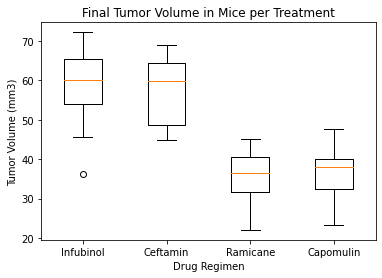

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex = False, sharey= True)
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Mice per Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot([(tumor_vol[drugs_list[0]]),
            (tumor_vol[drugs_list[1]]),
            (tumor_vol[drugs_list[2]]),
            (tumor_vol[drugs_list[3]])],
            labels=drugs_list)
print(drugs_list)
plt.show()

## Line and Scatter Plots

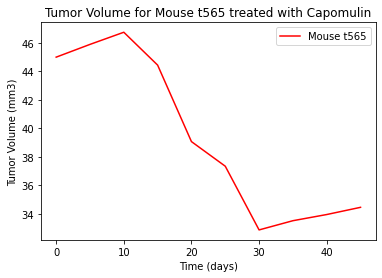

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_mouse = clean_df.loc[clean_df["Mouse ID"]=="t565",:]
time = capo_mouse.Timepoint.tolist()
tumor_vol_t565 = capo_mouse["Tumor Volume (mm3)"]
capo_treatment = plt.plot(time, tumor_vol_t565, color="red", label="Mouse t565")
plt.title("Tumor Volume for Mouse t565 treated with Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=capo_treatment, loc="best")

Text(0, 0.5, 'Tumor Volume (mm3)')

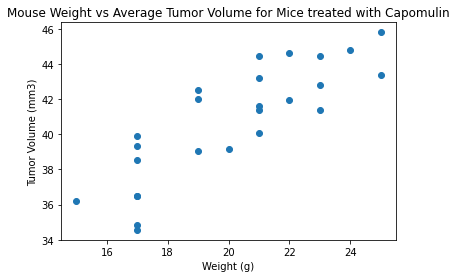

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
capo_mouse_grouped = capomulin_data.groupby("Mouse ID").mean()
mouse_weight = capo_mouse_grouped["Weight (g)"]
avg_tumor_vol = capo_mouse_grouped["Tumor Volume (mm3)"]
plt.scatter(mouse_weight,avg_tumor_vol)
plt.title("Mouse Weight vs Average Tumor Volume for Mice treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)") 

## Correlation and Regression

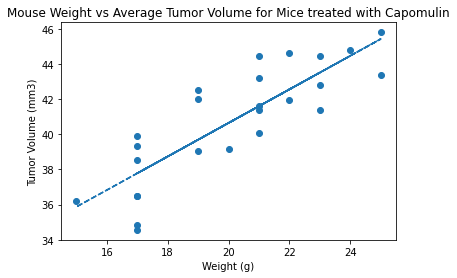

The mouse weight to average tumor volume for Capomulin has a Pearson's correlation coefficient of 0.8419363424694718.


In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(
    mouse_weight, avg_tumor_vol)
capo_fit = capo_slope * mouse_weight + capo_int
plt.plot(mouse_weight,capo_fit,"--")
plt.scatter(mouse_weight,avg_tumor_vol)
plt.title("Mouse Weight vs Average Tumor Volume for Mice treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)") 
plt.show()
print(f"The mouse weight to average tumor volume for Capomulin has a Pearson's correlation coefficient of {capo_r}.")